In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
import seaborn as sns
import pandas as pd
from skimage import transform, io
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout,Activation,Flatten

In [153]:
train_data_dir = './data/train_x.npy'
train_label_dir = './data/train_y.npy'
test_data_dir = './data/test_x.npy'
test_label_dir = './data/test_y.npy'
words_dir = 'D:\\GIT\\Dian\\labels\\words'

words = pd.read_csv(words_dir, header=None)

train_data = np.load(train_data_dir, allow_pickle=True)
train_label = np.load(train_label_dir, allow_pickle=True)

test_data = np.load(test_data_dir, allow_pickle=True)
test_label = np.load(test_label_dir, allow_pickle=True)

In [133]:
words.columns = ['features']
label_num = 374
print(words)

     features
0        city
1    mountain
2         sky
3         sun
4       water
..        ...
369      maui
370    school
371     canoe
372      race
373    hawaii

[374 rows x 1 columns]


### train freq

In [3]:
# A = np.argmax(X_label, axis = 1)
A = np.nonzero(train_label)[1]
A = np.bincount(A)
print(A)

[  67  307  883  101 1004  254  854    9   14   43  177  155  670   78
  136  446    4   28   59    3  113   45  179   15    8  123   21  408
   35   31    3    4  147  199   29    5   30   21    4    1   21   12
   12   44   24  198  122  267   33   99   71   34   55   60   71    4
   48  198  269    8   15  228   21   10  112   30   15    5   18   25
   76   32  129   77   89    9   13   27   96    1    9   19  184    7
   21   56    9  124   35    6   16   24    7   84    9   96   91   21
   71    6    7   32    5   15   21   36    5    5    6   37   37   18
   51   48   47    9    2   30   14   27   98   53   79   13   59  203
    2   17    5    3   34  107  212  134   49   37  106   16   17    4
   37   56    9    7  122    6   10   20    9    3   94   76   23   17
    6   17   40   35    3  117    4    3    2    8    4   10    0   12
   26    6   14   35    7   13    1   24    7   10   12   17    2   11
   16   14    6   11    9   42   55    8   57   21    7   13    6    8
   20 

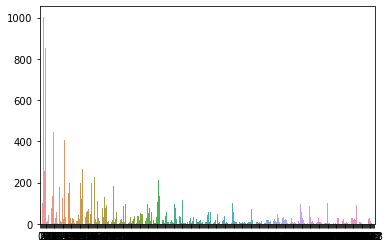

In [26]:
v = np.arange(0, label_num)
sns.barplot(x = v, y = A)

### test freq

In [5]:
# A = np.argmax(X_label, axis = 1)
A = np.nonzero(test_label)[1]
A = np.bincount(A)
print(A)

[ 10  38 105  10 116  26  93   0   1   2  18  15  74   2  12  51   0   3
   4   0  18   4  17   1   0  15   3  54   2   2   0   1  19  25   1   1
   1   2   0   0   1   1   1  10   2  22  13  31   9  12   2   2   9   4
  11   0   4  17  27   0   3  22   3   3  10   7   1   0   2   6   7   1
  15  11   9   1   1   6   9   0   1   2  19   0   2   5   1  19   7   0
   1   4   1   5   0  11  10   6   9   1   0   3   0   0   0   1   0   0
   1   2   6   3   8   9   4   0   0   4   2   4  13   6   8   1   4  26
   1   2   1   1   2  12  21  17   6   2  11   2   3   0   2   4   0   2
  11   1   2   2   1   1  11  11   3   2   1   1   2   2   0  10   0   1
   0   3   2   1   1   0   1   1   2   4   1   0   1   2   0   1   2   2
   0   4   0   0   0   0   0   6   2   2   4   2   2   1   0   1   0   0
  10   0   3   0   1   3   0   2   7   0   0   0   3   1   0   0   1  12
   4   0   2   0   3   3   0   3   1   1   1   0   3   0   0   2   1   0
   1   0   7   4   0   1   0   1   0   2   1   1   

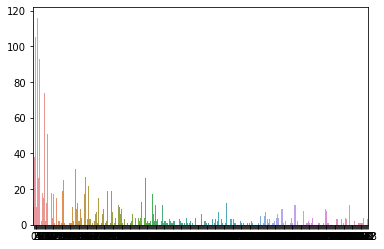

In [6]:
v = np.arange(0, label_num)
sns.barplot(x = v, y = A)

### get most probable indices

In [132]:
A = np.nonzero(train_label)[1]
A = np.bincount(A)
most_probable = np.argsort(-A)
print(most_probable.shape, most_probable)

(374,) [  4   2   6  12  15  27   1  58  47   5  61 132 125  33  45  57  82  22
  10  11  32  14 133  72  87  25 144  46 159  20  64 131 136 215 321   3
  49 120  78  95 150 291  96 353  74 301  93 122  13  73 278  70 151 236
  50  98 259  54 277   0 327  53 216  18 124 190  85 141 292  52 188 326
 121 112 198 134 113  56 114 265  21  43   9 187 156 206 140 288 135 109
 110 105  88 302 157  28 171 130  51  48  71 101 272  29 117 311  65  36
  34 281 271  17 293 332 210 349 333  77 348 119 266 368 168 274  69  91
 175  44 152 339 367  84 191  37  97 104  40 351  62 262  26 237 196 147
  81  68 273 308 253 111 344 350 275 294 255 138 153 155 179 127 352 287
 254 182 205 373 137  90 217 103 369 239 297  66 258  23  60 289 304 118
 183 269   8 170 263  76 261 193 123 364 203 221 220 173 247 257 338 178
  41 167 204  42 267 228 335 181 233 185 306 282 234 358 177 218 146 264
 165  63  94 115 315  75  80 268   7  86 313 186 208 142 202 148 219 226
 163 242 195 284  59  24 312 303 189 235 256

## the propotion of the first several labels

In [38]:
total_labels = np.sum(A)
count_labels = 0
for i in range(374):
    count_labels = count_labels + A[most_probable[i]]
    print('Counting the first {} labels, occupying {}, appear for {} times'.format(i+1, count_labels / total_labels, A[most_probable[i]]))

Counting the first 1 labels, occupying 0.06335584022212407, appear for 1004 times
Counting the first 2 labels, occupying 0.11907616583580488, appear for 883 times
Counting the first 3 labels, occupying 0.17296649208051998, appear for 854 times
Counting the first 4 labels, occupying 0.21524578784628004, appear for 670 times
Counting the first 5 labels, occupying 0.24338991607244273, appear for 446 times
Counting the first 6 labels, occupying 0.26913611409099514, appear for 408 times
Counting the first 7 labels, occupying 0.2885088660314255, appear for 307 times
Counting the first 8 labels, occupying 0.3054836877642456, appear for 269 times
Counting the first 9 labels, occupying 0.32233230264403356, appear for 267 times
Counting the first 10 labels, occupying 0.33836057297911276, appear for 254 times
Counting the first 11 labels, occupying 0.3527481542247744, appear for 228 times
Counting the first 12 labels, occupying 0.3661260806461791, appear for 212 times
Counting the first 13 labels

In [129]:
data = np.zeros((4500, label_num)) # 第一个维度是元素数量，第二个维度是是否满足标签
for i in range(train_data.shape[0]):
    cur_label = np.nonzero(train_label[i]) # 获取当前图片所有的标签
    data[i,cur_label] = 1
Data_collection = pd.DataFrame(data = data, dtype = int, columns=range(label_num))
print(Data_collection)

      0    1    2    3    4    5    6    7    8    9    ...  364  365  366  \
0       1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    1    0    0    1    1    1    0  ...    0    0    0   
2       0    0    0    1    0    0    0    0    0    1  ...    0    0    0   
3       0    0    1    1    0    0    0    0    0    1  ...    0    0    0   
4       0    0    1    1    0    1    0    0    0    1  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4495    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4496    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4497    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4498    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4499    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      367  368  369  370  371  372  373  
0       0    0    0  

In [134]:
print(np.sum(Data_collection[4]))

1004


### drop features

In [146]:
rid_num = 30
least_appear = most_probable[-rid_num:] - 1
new_Data = Data_collection.drop(least_appear, axis=1).columns # 剩下的标签
tmp = {'index':new_Data, 'features':words['features'][new_Data]}
new_words = pd.DataFrame(tmp)
new_words.index = range(label_num - rid_num)
new_words.to_csv('./data/new_words.csv')
print(new_words)

     index  features
0        0      city
1        1  mountain
2        2       sky
3        3       sun
4        4     water
..     ...       ...
339    367      oahu
340    368     kauai
341    369      maui
342    372      race
343    373    hawaii

[344 rows x 2 columns]


In [151]:
new_train_data = Data_collection.drop(least_appear, axis=1)
new_train_data.columns = range(label_num - rid_num)
new_train_data.to_csv('./data/new_labels.csv')
print(new_train_data)

      0    1    2    3    4    5    6    7    8    9    ...  334  335  336  \
0       1    1    1    1    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    1    0    0    1    1    1    0  ...    0    0    0   
2       0    0    0    1    0    0    0    0    0    1  ...    0    0    0   
3       0    0    1    1    0    0    0    0    0    1  ...    0    0    0   
4       0    0    1    1    0    1    0    0    0    1  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4495    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4496    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4497    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4498    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4499    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      337  338  339  340  341  342  343  
0       0    0    0  

In [10]:
'''
input : label and x_Data
putput : 9 pictures belongs to that label
'''
def show_image_at_label(labels, x):
    tot = np.sum(labels)
    if tot > 9:
        tot = 9
    index = np.nonzero(np.array(labels))
    for i in range(tot):
        plt.subplot(3, 3, i+1)
        plt.imshow(x[index[0][i]])
        plt.axis('off')
    plt.show()

## Labels, nine most appeared

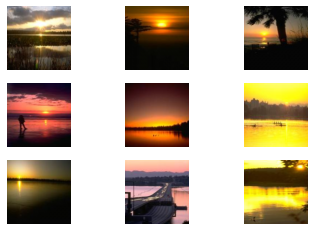

In [154]:
show_image_at_label(Data_collection[4], train_data)

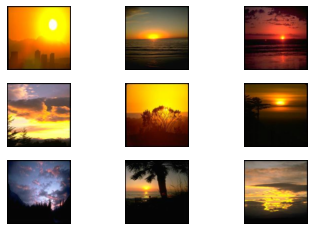

In [12]:
show_image_at_label(Data_collection[2], train_data)

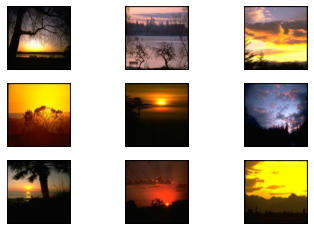

In [13]:
show_image_at_label(Data_collection[6], train_data)

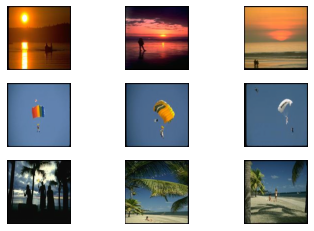

In [14]:
show_image_at_label(Data_collection[12], train_data)

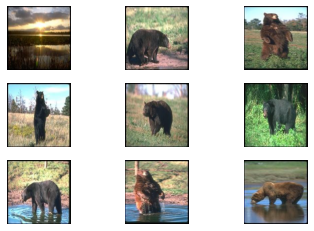

In [15]:
show_image_at_label(Data_collection[15], train_data)

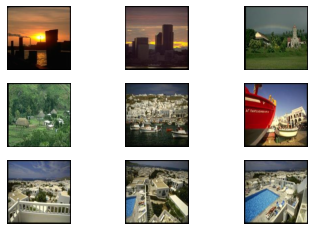

In [16]:
show_image_at_label(Data_collection[27], train_data)

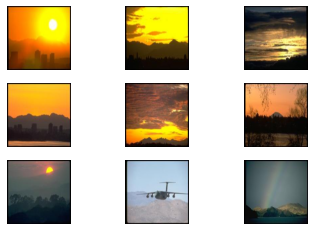

In [17]:
show_image_at_label(Data_collection[1], train_data)

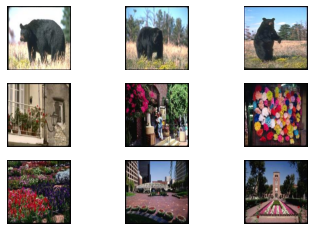

In [18]:
show_image_at_label(Data_collection[58], train_data)

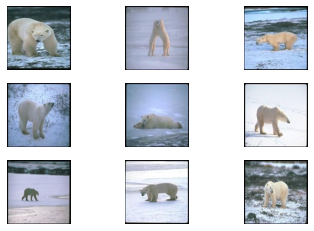

In [19]:
show_image_at_label(Data_collection[47], train_data)